# Traitement des datas

c'est un notebook qui a servi de brouillon, il n'est sûrement plus vraiment opérationnel

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
#from tslearn.clustering import TimeSeriesKMeans

In [45]:
fichier = open('epsilon_11_31_33.txt', 'r')

In [46]:
char = fichier.read()

In [47]:
char_split = char.split('# ===')

In [48]:
char_split = char_split[1:]

In [49]:
char_split = ['# ===' + x for x in char_split]

In [50]:
time = [float(x.split('\n')[0][13:]) for x in char_split]

In [51]:
char_split = [x.split('\n', maxsplit = 1) for x in char_split]

In [52]:
char_split[0][1][2:250]

'node  X  Y  Z  gpeto11  gpeto31  gpeto33  \n31  2.7125294759e+01  9.8466824182e+00  -6.7850000000e+01  4.9105525250e-04  4.8373063328e-04  1.1178031564e-03  \n33  -2.7347095966e+01  9.5813266371e+00  -6.7850000000e+01  1.3093696907e-03  -5.6671898346'

In [53]:
doc = [x[1][2:] for x in char_split]

In [54]:
len(doc[0])

6480147

In [55]:
len(doc[1])

6480216

In [56]:
for k in range(len(doc)): 
    with open('time' + str(k) + '.txt', 'w') as file : 
        file.write(doc[k])

In [57]:
df = pd.read_csv('time1.txt', sep = '  ')

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3856340900.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('time1.txt', sep = '  ')


In [58]:
lst_df = []
for k in range(28):
    lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))
/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))
/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separa

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))
/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  lst_df.append(pd.read_csv('time_series/'+'time' + str(k) + '.txt', sep = '  '))
/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_2355/3427446850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separa

In [59]:
df = pd.concat(lst_df)
df

,node,X,Y,Z,gpeto11,gpeto31,gpeto33
0,31,27.125295,9.846682,-67.850000,0.000491,0.000484,0.001118
1,33,-27.347096,9.581327,-67.850000,0.001309,-0.000567,0.001440
2,43,-19.868158,5.895601,-65.438903,0.000579,-0.000107,0.002184
3,44,-17.509594,4.952852,-62.898903,0.000725,-0.000105,0.001752
4,45,-19.868158,5.895601,-61.628903,0.000603,-0.000065,0.002039
...,...,...,...,...,...,...,...
54227,2342475,26.816913,9.616926,-14.061950,-0.000032,0.000032,0.000055
54228,2342476,26.816913,9.616926,-13.801228,-0.000031,0.000032,0.000054
54229,2342523,22.057412,6.361321,-53.767238,0.000767,-0.000088,-0.000349
54230,2342524,21.613723,6.105231,-53.965790,0.000524,-0.000087,-0.000284


In [60]:
nodes = df['node'].unique()

In [72]:
by_nodes = {}

In [73]:
for node in nodes : 
    aux = df[df['node'] == node].copy()
    aux['time'] = time
    aux = aux.drop(['node','X', 'Y', 'Z'], axis = 1)
    aux.set_index('time', inplace = True)
    aux[str(node)] = 1/2*(aux['gpeto11'] +aux['gpeto33'] + np.sqrt(np.square(aux['gpeto11'] - aux['gpeto33']) + 4*np.square(aux['gpeto31']) ))
    by_nodes[str(node)] = aux

In [74]:
nodes_str = list(by_nodes.keys())

<AxesSubplot:xlabel='time'>

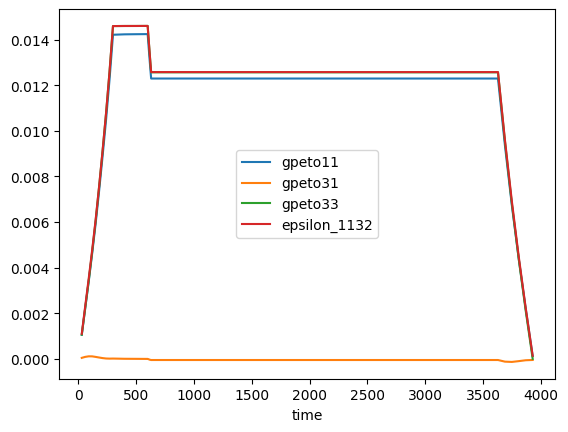

In [318]:
by_nodes[nodes_str[520]].plot()

In [334]:
test

time,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,270.0,300.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
epsilon_31,0.001381,0.002936,0.004601,0.006681,0.010590,0.016683,0.022709,0.028125,0.033974,0.04075,...,0.039911,0.039912,0.039912,0.039912,0.039912,0.036154,0.032024,0.025721,0.018334,0.011430
epsilon_33,0.001945,0.004156,0.006397,0.009004,0.011478,0.014675,0.020829,0.026554,0.032728,0.03996,...,0.037888,0.037888,0.037888,0.037887,0.037887,0.032482,0.026983,0.022052,0.017714,0.014127


In [75]:
lst_eps = []

In [76]:
for node in nodes_str:
    lst_eps.append(by_nodes[node].copy().drop(['gpeto11','gpeto31', 'gpeto33'], axis = 1).transpose())

In [77]:
df_eps = pd.concat(lst_eps)

In [78]:
df_eps

time,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,270.0,300.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
31,0.001381,0.002936,0.004601,0.006681,0.010590,0.016683,0.022709,0.028125,0.033974,0.040750,...,0.039911,0.039912,0.039912,0.039912,0.039912,0.036154,0.032024,0.025721,0.018334,0.011430
33,0.001945,0.004156,0.006397,0.009004,0.011478,0.014675,0.020829,0.026554,0.032728,0.039960,...,0.037888,0.037888,0.037888,0.037887,0.037887,0.032482,0.026983,0.022052,0.017714,0.014127
43,0.002191,0.004675,0.007056,0.009447,0.011824,0.014021,0.016233,0.018997,0.021656,0.024301,...,0.019458,0.019458,0.019458,0.019458,0.019458,0.013356,0.008043,0.004115,0.002831,0.001372
44,0.001763,0.003763,0.005622,0.007351,0.008987,0.010551,0.012098,0.013961,0.016068,0.018660,...,0.014890,0.014891,0.014892,0.014892,0.014892,0.009960,0.006351,0.004446,0.002659,0.000822
45,0.002042,0.004384,0.006683,0.009056,0.011470,0.013742,0.016055,0.018649,0.021334,0.024740,...,0.020268,0.020266,0.020265,0.020265,0.020265,0.014261,0.008865,0.004630,0.001712,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342475,0.001128,0.002374,0.003603,0.004883,0.006219,0.007688,0.009240,0.010877,0.012730,0.014802,...,0.012697,0.012697,0.012697,0.012697,0.012697,0.009548,0.006790,0.004369,0.002162,0.000066
2342476,0.001128,0.002374,0.003603,0.004884,0.006221,0.007691,0.009244,0.010882,0.012737,0.014811,...,0.012705,0.012705,0.012705,0.012705,0.012705,0.009553,0.006793,0.004371,0.002163,0.000065
2342523,0.001062,0.002274,0.003484,0.004767,0.006122,0.007580,0.009125,0.010755,0.012478,0.014277,...,0.012163,0.012163,0.012163,0.012163,0.012163,0.009099,0.006337,0.004410,0.002597,0.000774
2342524,0.001051,0.002250,0.003450,0.004725,0.006074,0.007530,0.009076,0.010706,0.012435,0.014238,...,0.012153,0.012153,0.012153,0.012153,0.012153,0.009116,0.006380,0.004360,0.002442,0.000533


In [438]:
model = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter = 10)
prediction = model.fit_predict(df_eps)

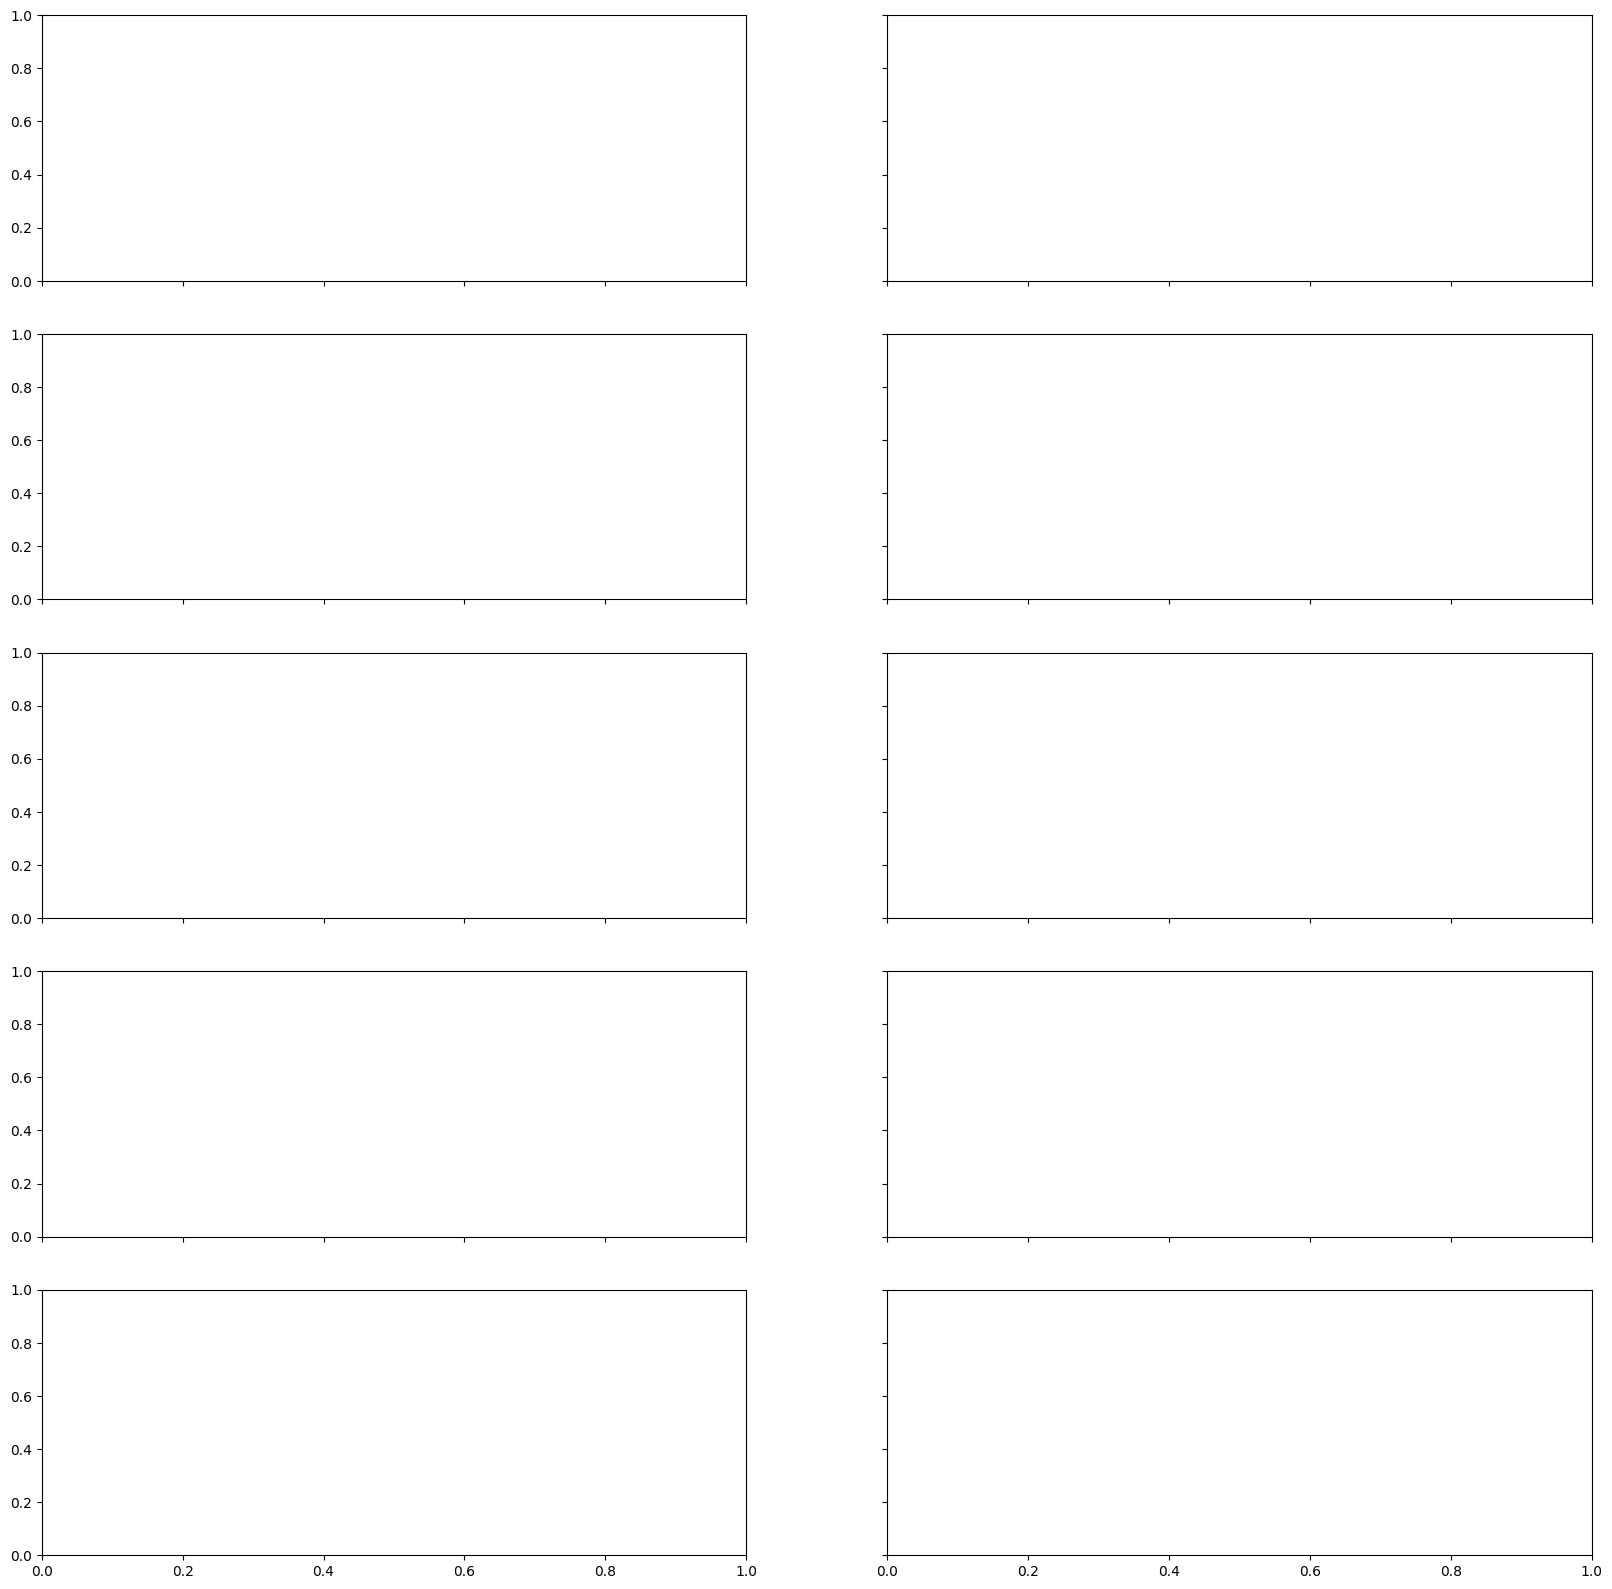

In [440]:
fig, axes = plt.subplots(5,2,figsize = (20,20), sharex = True, sharey = True)

In [442]:
for k in range(len(prediction)): 
    axes[prediction[k]//2, prediction[k]%2].plot(df_eps.iloc[k,:])

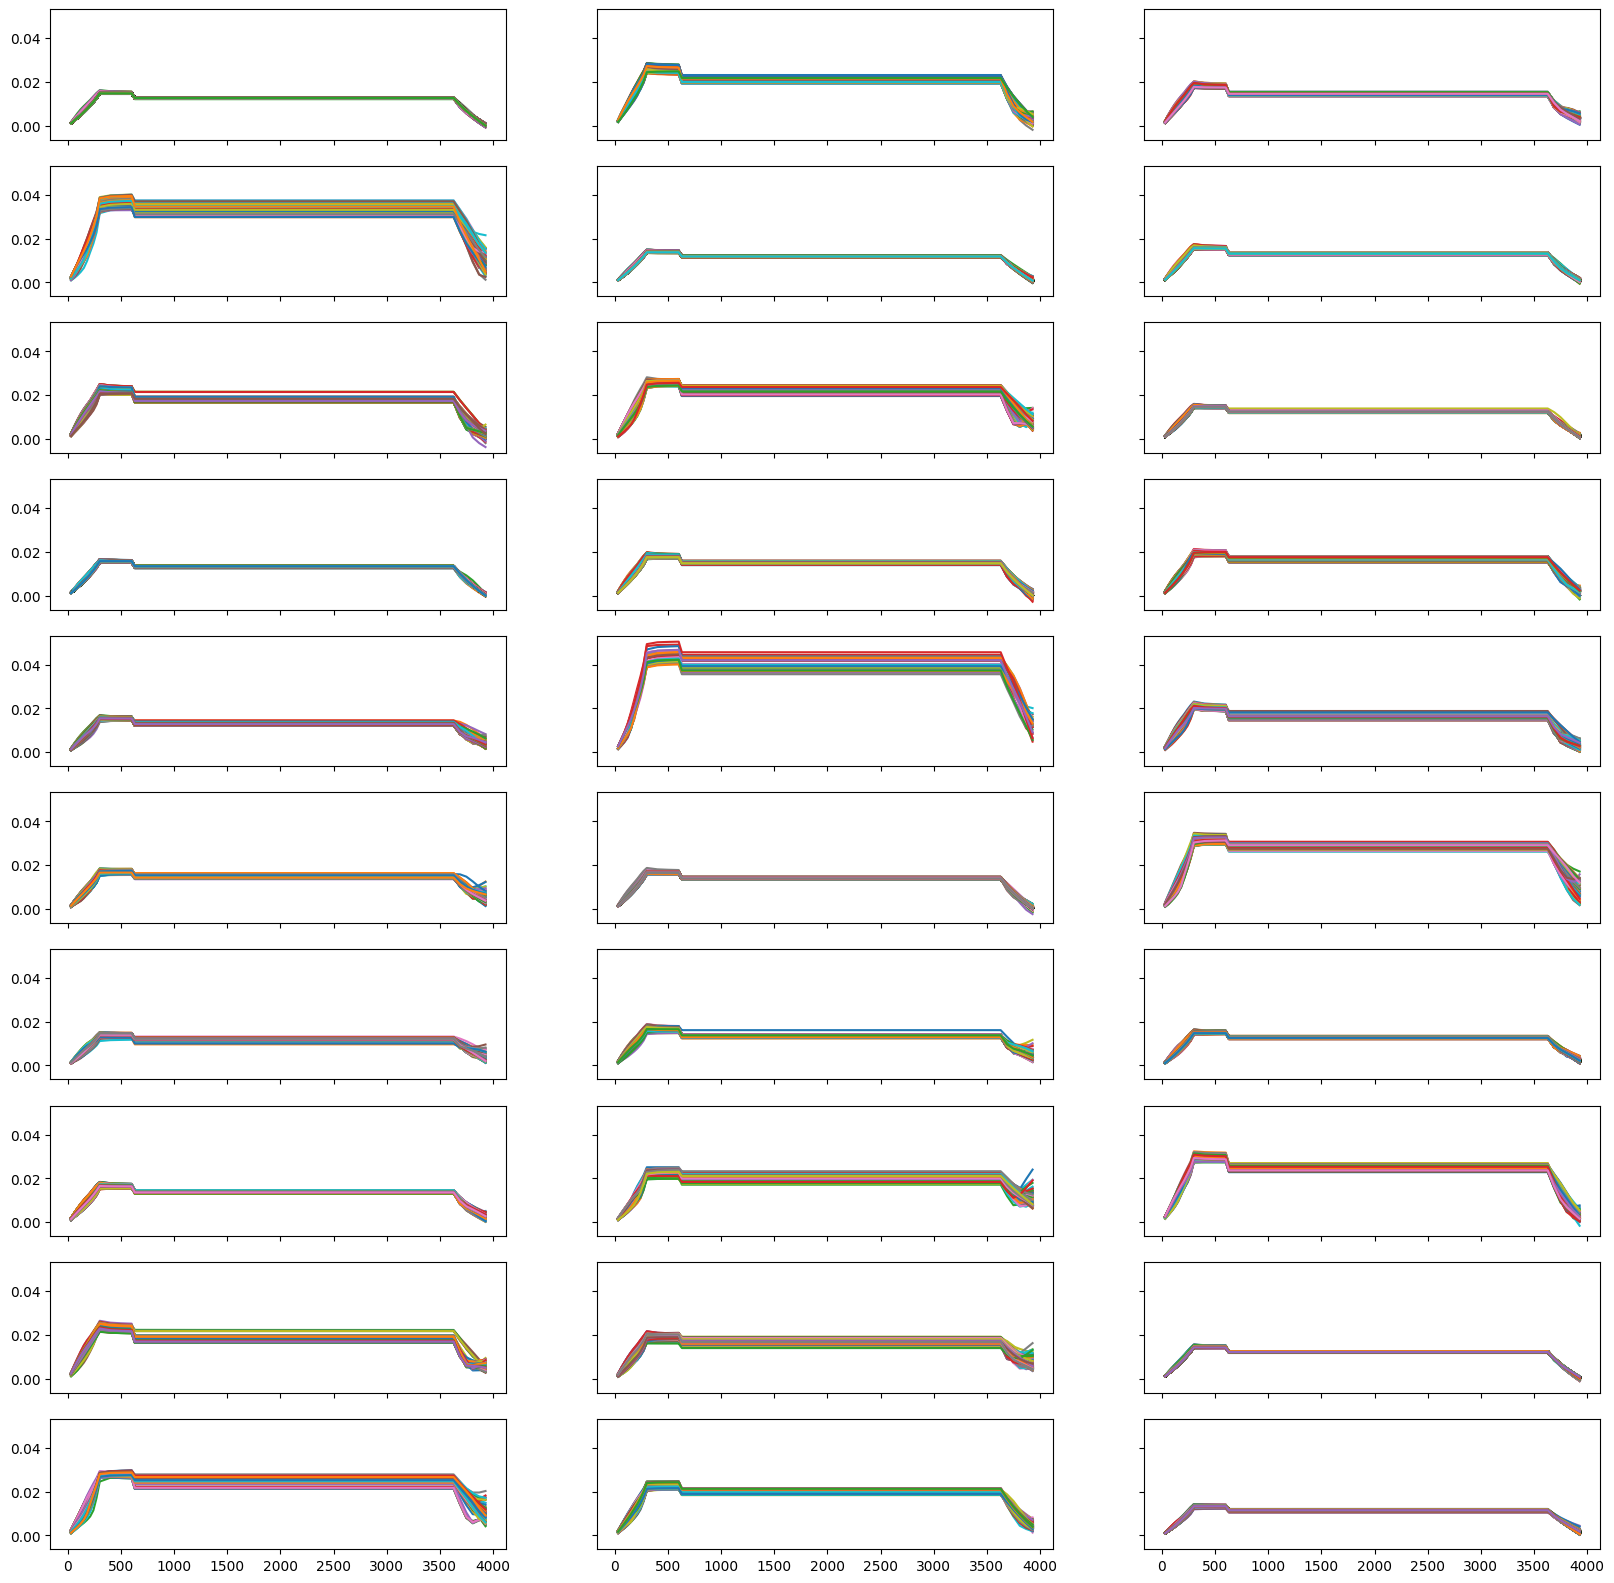

In [437]:
fig

In [443]:
with open('cluster_10.txt', 'w') as clus :
    for x in prediction : 
        clus.write(str(x) + '\n')

In [444]:
clus.close()

## Coordonnées des noeuds 

In [30]:
df = pd.read_csv('time_series/time1.txt', sep = '  ')

/var/folders/74/tnqb5dbj5b18r7nmrq7y60000000gn/T/ipykernel_1288/2195499791.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('time_series/time1.txt', sep = '  ')


In [31]:
df

,node,X,Y,Z,gpeto11,gpeto31,gpeto33
0,31,27.125295,9.846682,-67.850000,0.001047,0.001015,0.002390
1,33,-27.347096,9.581327,-67.850000,0.002819,-0.001213,0.003056
2,43,-19.868158,5.895601,-65.438903,0.001233,-0.000228,0.004660
3,44,-17.509594,4.952852,-62.898903,0.001543,-0.000222,0.003741
4,45,-19.868158,5.895601,-61.628903,0.001268,-0.000138,0.004378
...,...,...,...,...,...,...,...
54227,2342475,26.816913,9.616926,-14.061950,0.002369,-0.000015,0.002326
54228,2342476,26.816913,9.616926,-13.801228,0.002370,-0.000015,0.002328
54229,2342523,22.057412,6.361321,-53.767238,0.001920,0.000007,0.002274
54230,2342524,21.613723,6.105231,-53.965790,0.002028,0.000011,0.002249


In [32]:
coord = df.copy()[['node', 'X', 'Y', 'Z']]

In [34]:
coord.set_index('node', inplace = True )

In [36]:
coord.describe()

,X,Y,Z
count,54232.000000,54232.000000,54232.000000
mean,-3.129368,4.298810,-36.243022
std,16.566505,2.521680,18.993212
min,-27.347096,0.976828,-67.850000
25%,-19.152495,1.809455,-52.898836
50%,-4.358311,4.436157,-36.433370
75%,10.903520,6.298100,-20.173782
max,27.125295,9.846682,0.000000


In [37]:
coord 

,X,Y,Z
node,,,
31,27.125295,9.846682,-67.850000
33,-27.347096,9.581327,-67.850000
43,-19.868158,5.895601,-65.438903
44,-17.509594,4.952852,-62.898903
45,-19.868158,5.895601,-61.628903
...,...,...,...
2342475,26.816913,9.616926,-14.061950
2342476,26.816913,9.616926,-13.801228
2342523,22.057412,6.361321,-53.767238


In [38]:
coord.to_csv('coord.csv')

In [24]:
df = pd.read_csv('Classifcation/timeSeries_classe_10.csv')

In [25]:
df2 = df.groupby('classe').get_group(0)

In [26]:
df2

,node,classe,30.0,60.0,90.0,120.0,150.0,180.0,210.0,240.0,...,1230.0,1830.0,2430.0,3030.0,3630.0,3690.0,3750.0,3810.0,3870.0,3930.0
10,epsilon_51,0,0.001152,0.002459,0.003766,0.005173,0.006653,0.008301,0.010057,0.011880,...,0.013600,0.013600,0.013600,0.013600,0.013600,0.010226,0.007258,0.004742,0.002561,0.000544
11,epsilon_52,0,0.001089,0.002316,0.003523,0.004796,0.006151,0.007652,0.009274,0.011022,...,0.013614,0.013614,0.013614,0.013614,0.013614,0.010496,0.007689,0.005233,0.002992,0.000948
12,epsilon_53,0,0.001110,0.002366,0.003620,0.004963,0.006380,0.007921,0.009567,0.011285,...,0.012899,0.012899,0.012899,0.012899,0.012899,0.009686,0.006860,0.004496,0.002390,0.000407
13,epsilon_54,0,0.001080,0.002291,0.003480,0.004726,0.006039,0.007483,0.009041,0.010698,...,0.012979,0.012979,0.012979,0.012979,0.012979,0.009929,0.007195,0.004832,0.002689,0.000709
14,epsilon_55,0,0.001100,0.002340,0.003576,0.004888,0.006277,0.007785,0.009374,0.011043,...,0.012590,0.012590,0.012590,0.012590,0.012590,0.009413,0.006638,0.004347,0.002275,0.000292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54224,epsilon_2342325,0,0.001164,0.002438,0.003713,0.005060,0.006502,0.008075,0.009738,0.011521,...,0.013440,0.013440,0.013440,0.013440,0.013440,0.010043,0.007126,0.004529,0.002185,0.000056
54225,epsilon_2342326,0,0.001165,0.002441,0.003717,0.005065,0.006505,0.008079,0.009741,0.011521,...,0.013437,0.013437,0.013437,0.013437,0.013437,0.010038,0.007119,0.004522,0.002186,0.000062
54226,epsilon_2342474,0,0.001128,0.002375,0.003605,0.004885,0.006222,0.007692,0.009244,0.010882,...,0.012704,0.012704,0.012704,0.012704,0.012704,0.009552,0.006792,0.004370,0.002162,0.000065
54227,epsilon_2342475,0,0.001128,0.002374,0.003603,0.004883,0.006219,0.007688,0.009240,0.010877,...,0.012697,0.012697,0.012697,0.012697,0.012697,0.009548,0.006790,0.004369,0.002162,0.000066


In [27]:
df2 = df2[['node', '300.0', '3630.0']]

In [28]:
df2.set_index('node', inplace = True)

In [34]:
df2.describe().loc[['min', 'max']]

,300.0,3630.0
min,0.01399,0.011966
max,0.01731,0.013908


In [41]:
df = pd.read_csv('LHS points.csv')

In [42]:
df = df.drop('Unnamed: 0', axis = 1)
col = {'epsilon 300.0' : 'epsilon_300', 'epsilon 3630.0' : 'epsilon_600'}
index = list(range(10))
df = df.rename(columns = col)

In [43]:
df

,epsilon_300,epsilon_600
0,0.015468,0.012869
1,0.015675,0.013507
2,0.014404,0.012510
3,0.016052,0.013194
4,0.016392,0.012319
...,...,...
95,0.015048,0.013332
96,0.015268,0.013666
97,0.013654,0.011691
98,0.014114,0.012858


In [46]:
lst = [df.iloc[10*k : 10*(k+1), :] for k in range(10)]
for k in range(10) : 
    lst[k].to_csv('LHS/points_' + str(k) + '.csv')

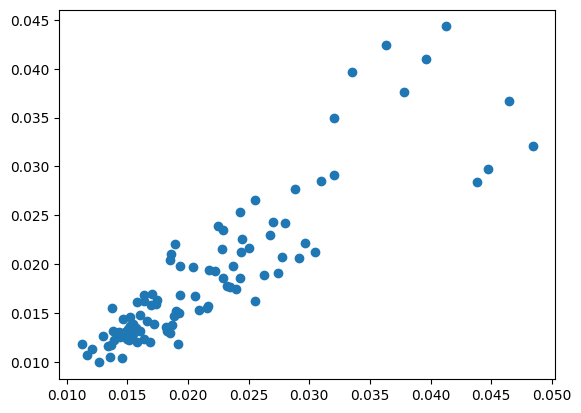

In [45]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.savefig('/Users/damidoum/Desktop/rapport_MIG/Images/LHS')

In [5]:
timeSeries = pd.read_csv('time_series2/epsilon.csv')

In [14]:
timeSeries = timeSeries.rename({'Unnamed: 0' : 'node'})
timeSeries.set_index('node', inplace = True)

In [16]:
list(timeSeries.index)

[31,
 33,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 266,
 267,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 783,
 784,
 785,
 78

In [22]:
lst = list(range(10,20))
index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [25]:
pd.DataFrame(lst, name = index)

TypeError: __init__() got an unexpected keyword argument 'name'

In [16]:
df = pd.read_csv('timeSeries_classe_10.csv')
df.set_index('node', inplace=True)
df = df[['300.0', '3630.0', 'classe']]

In [18]:
df.to_csv('for_krigeage.csv')

In [2]:
df = pd.read_csv('timeSeries_classe_10.csv')

In [5]:
df.set_index('node',inplace = True)

In [24]:
df = df[['300.0', '3630.0', 'classe']]
df0 = df.groupby('classe').get_group(1)
df0.iloc[[19,312,431,813,1212]]

,300.0,3630.0,classe
node,,,
epsilon_688,0.022946,0.017793,1
epsilon_217166,0.020364,0.016943,1
epsilon_314013,0.020846,0.015887,1
epsilon_947330,0.019591,0.014792,1
epsilon_1553917,0.019351,0.015628,1


In [ ]:
{'280.8123440237228' : 1.016275750369611e+02, '273.74794283737083' : 1.007771340264554e+02, }

In [19]:
df3 = df.groupby('classe').describe()

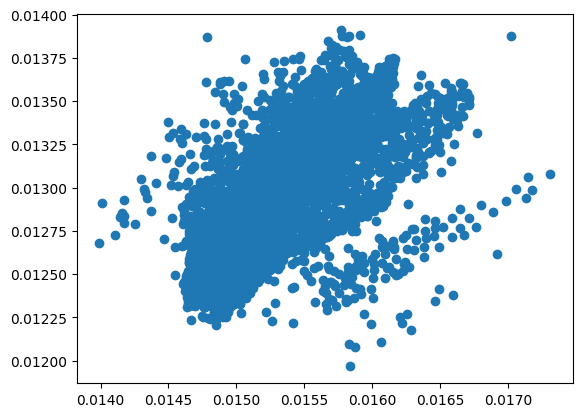

In [23]:
plt.scatter(df0['300.0'], df0['3630.0'])

In [25]:
df = pd.read_csv('LHS points.csv')

In [27]:
df = df.iloc[:10]

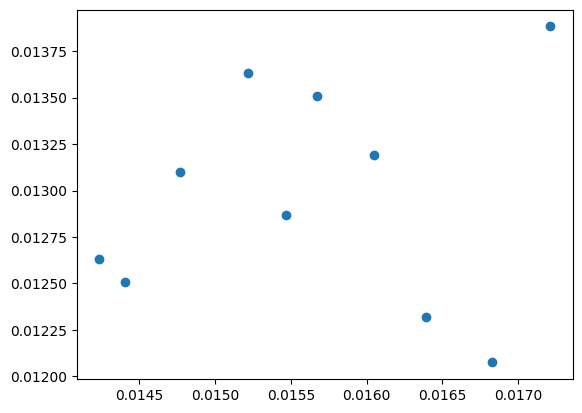

In [32]:
plt.scatter(df.iloc[:,1], df.iloc[:,2])